<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 6 Homework 5-Part 1:

In [77]:
#Import Iris Data and other statements
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [78]:
#Save Iris data
iris = load_iris()
x = iris.data

In [79]:
#Make the range of clusters to test
k_rng = range(1,11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k, n_init=10)
  km.fit(x)
  sse.append(km.inertia_)

In [80]:
#Check values
sse

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.4201917862839,
 29.99042640692641,
 28.273204184704184,
 26.51417477517323]

Text(0.5, 1.0, 'The elbow method')

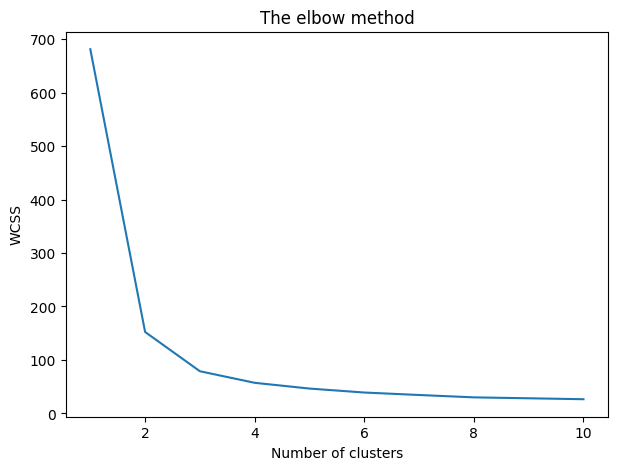

In [81]:
#Create the elbow method plot
fig = plt.figure(figsize = (7,5))
plt.plot(range(1,11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('The elbow method')

# Week 6 Homework 5-Part 2:


In [82]:
#Import statements
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time


#Import Dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', parser='auto')

In [83]:
#Split data for training and testing
X = mnist.data
y = mnist.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

#Logistic Regression without PCA
logreg = LogisticRegression(solver='lbfgs')
start = time.time()
logreg.fit(X_train, y_train)
stop = time.time()

#Get accuracy score and time, then print
y_pred = logreg.predict(X_test)
score_noPCA = accuracy_score(y_test, y_pred)
time_noPCA = (stop - start)
print(f'Accuracy without PCA: {score_noPCA:.2%}')
print(f'Time taken without PCA: {time_noPCA:.2f} seconds')

Accuracy without PCA: 92.10%
Time taken without PCA: 45.71 seconds


In [84]:
#Apply PCA to data
pca = PCA(n_components = 2, random_state= 8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#Logistic Regression with PCA
start = time.time()
logreg.fit(X_train_pca, y_train)
stop = time.time()

#Get accuracy score and time, then print
y_pred = logreg.predict(X_test_pca)
score_PCA = accuracy_score(y_test, y_pred)
time_PCA = (stop - start)
print(f'Accuracy with PCA: {score_PCA:.2%}')
print(f'Time taken with PCA: {time_PCA:.2f} seconds')

Accuracy with PCA: 43.99%
Time taken with PCA: 2.68 seconds
